## Logistic Regression

In deep learning field, there are 2 main branches of NN, which are **regression** and **classification**, respectively.  
In previous part, we discuss about the regression problem and use Pytorch to realize it. And in this part, we will discuss about the classification problem. Let's start with the simpliest classification problem, i.e. logistic.

Let's recall the regression problem, the output of it is always:
$$
\hat{y}=\omega x+b \in \mathbb{R}
$$
However, in logistic problem we want output to be probability instead of real numbers. Therefore we have to use a **logistic function** to map it.
$$
\sigma(x) = \frac{1}{1 + e^{-x}}
$$
Then the output
$$
\hat{y} \in [0,1]
$$
Let's have a look at the logistic function:

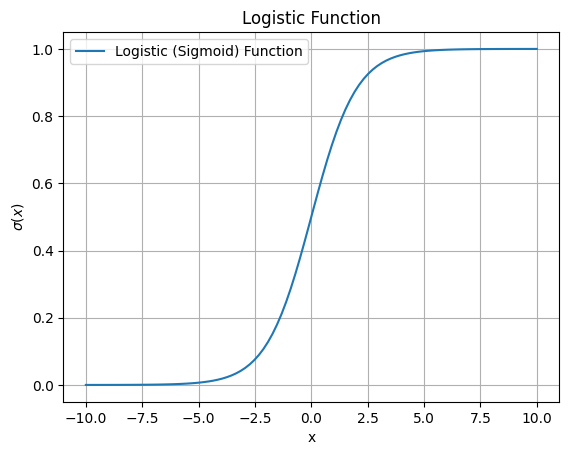

In [24]:
import numpy as np

def logistic(x):
    return 1 / (1 + np.exp(-x))

x = np.linspace(-10, 10, 100)
y = logistic(x)

import matplotlib.pyplot as plt

plt.plot(x, y, label='Logistic (Sigmoid) Function')
plt.title('Logistic Function')
plt.xlabel('x')
plt.ylabel(r'$\sigma(x)$')
plt.grid(True)
plt.legend()
plt.show()


To implement logistic regression, we can do some modifications based on the affine model used in previous section:
![SGD_vs_GD](./img/P6/log_vs_affine.png)

So...What about the loss function?  
Since obviously we cannot use the MSE function to decribe the error of classification problems, in here we use BCE loss function for this binary classification problems.
![SGD_vs_GD](./img/P6/BCE.png)
Then let's implement it!

In [25]:
import torch
import torch.nn.functional as F

### Step 1: Define the model:

Be aware that we need to add a sigmoid function in the forward method as explained in first pic above.

In [26]:
#design model using class
class LogisticRegressionModel(torch.nn.Module):
    def __init__(self):
        super(LogisticRegressionModel, self).__init__()
        self.linear = torch.nn.Linear(1,1)
 
    def forward(self, x):
        # y_pred = F.sigmoid(self.linear(x))
        y_pred = torch.sigmoid(self.linear(x))
        return y_pred
model = LogisticRegressionModel()

Then prepare for the dataset and define the loss function and the optmizier}

In [27]:
x_data = torch.Tensor([[1.0], [2.0], [3.0]])
y_data = torch.Tensor([[0], [0], [1]])

criterion = torch.nn.BCELoss(size_average = True) 
optimizer = torch.optim.SGD(model.parameters(), lr = 0.01)

D:\apps\anaconda3\envs\pytorch_env\lib\site-packages\torch\nn\_reduction.py:51: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))


### Step 2: Training:

In [28]:
# training cycle forward, backward, update
for epoch in range(1000):
    y_pred = model(x_data)
    loss = criterion(y_pred, y_data)
    print('Epoch: ', epoch, '\t Loss: ', loss.item())
 
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

Epoch:  0 	 Loss:  0.9069648385047913
Epoch:  1 	 Loss:  0.9014009833335876
Epoch:  2 	 Loss:  0.895923376083374
Epoch:  3 	 Loss:  0.8905315399169922
Epoch:  4 	 Loss:  0.8852250576019287
Epoch:  5 	 Loss:  0.8800036311149597
Epoch:  6 	 Loss:  0.8748664259910583
Epoch:  7 	 Loss:  0.8698131442070007
Epoch:  8 	 Loss:  0.8648431301116943
Epoch:  9 	 Loss:  0.8599559664726257
Epoch:  10 	 Loss:  0.8551508784294128
Epoch:  11 	 Loss:  0.8504273295402527
Epoch:  12 	 Loss:  0.8457846641540527
Epoch:  13 	 Loss:  0.8412222862243652
Epoch:  14 	 Loss:  0.8367393016815186
Epoch:  15 	 Loss:  0.8323352336883545
Epoch:  16 	 Loss:  0.828009307384491
Epoch:  17 	 Loss:  0.8237605690956116
Epoch:  18 	 Loss:  0.8195886611938477
Epoch:  19 	 Loss:  0.8154923319816589
Epoch:  20 	 Loss:  0.8114710450172424
Epoch:  21 	 Loss:  0.8075240254402161
Epoch:  22 	 Loss:  0.8036502003669739
Epoch:  23 	 Loss:  0.7998490929603577
Epoch:  24 	 Loss:  0.7961194515228271
Epoch:  25 	 Loss:  0.792460620403289

### Step 3: Test and show the result:

In [29]:
 
print('w = ', model.linear.weight.item())
print('b = ', model.linear.bias.item())
 
x_test = torch.Tensor([[0.236]])
y_test = model(x_test)
print('y_pred = ', y_test.data)

w =  0.5574124455451965
b =  -1.3950400352478027
y_pred =  tensor([[0.2204]])
